In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import scipy.io
import matplotlib.pyplot as plt
from algorithms_evaluation import *
import numpy as np
from IPython.core.display import Image, display

params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "y",
          "axes.facecolor" : "None",
          "text.color" : 'w'}
plt.rcParams.update(params)

## <center><font color=tomato>1. Regularized Linear Regression</font></center>
This dataset is divided into three parts:
-   A training set that your model will learn on: `X, y`
-   A cross validation set for determining the regularization parameter: `Xval`, `yval`
-   A test set for evaluating performance. These are 'unseen' examples which your model did not see during training: `Xtest`, `ytest`

In [21]:
# Load Training Data
data = scipy.io.loadmat('data/ex5data1.mat')
X = data['X']
y = data['y'].flatten()
Xtest = data['Xtest']
ytest = data['ytest'].flatten()
Xval = data['Xval']
yval = data['yval'].flatten()
m = X.shape[0]

X_ones = add_ones(X)
Xval_ones = add_ones(Xval)
Xtest_ones = add_ones(Xtest)

### <font color=lightGreen>1.1 Visualizing the dataset</font>

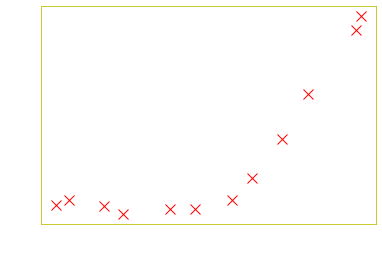

In [4]:
# Plot training data
plt.plot(X, y, 'rx', markersize=10, linewidth=1.5)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)');

### <font color=lightGreen>1.2 Regularized linear regression cost function and gradient</font>


In [5]:
initial_theta = np.array([1, 1])
m = X.shape[0]
X_ones = np.hstack((np.ones((m, 1)), X))
Lambda = 0
J, grad = linear_regression_reg_cost(initial_theta, X_ones, y, Lambda)
print(f'Cost at theta = [1 , 1]: {J:6f}')
print(f'Gradient at theta = [1 , 1]: \n {grad}')

Cost at theta = [1 , 1]: 303.951526
Gradient at theta = [1 , 1]: 
 [-15.30301567 598.16741084]


### <font color=lightGreen>1.4 Fitting linear regression</font>


In [6]:
theta = train_linear_reg(X_ones, y, Lambda)

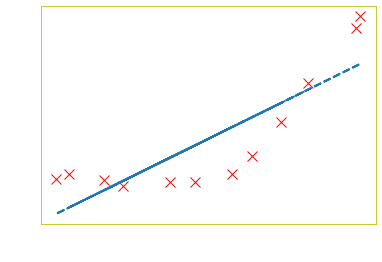

In [7]:
plt.plot(X, y, 'rx', markersize=10, linewidth=1.5)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.plot(X, X_ones @ theta, '--', linewidth=2);

## <center><font color=tomato>2. Bias-variance</font></center>
### <font color=lightGreen>2.1 Learning curves</font>
Typical learning curve for high <font color=mediumTurquoise>bias</font>

If a learning algorithm is suffering from high bias, getting more training data will not (by itself) help much.

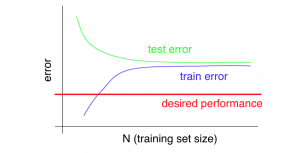

In [8]:
display(Image('data/img3.png'))

Typical learning curve for high <font color=mediumTurquoise>variance</font>

If a learning algorithm is suffering from high variance, getting more training data is likely to help.

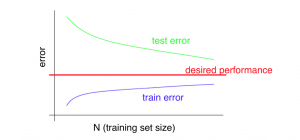

In [9]:
display(Image('data/img4.png'))

In [10]:
Lambda = 0
error_training, error_validation = learning_curve(X_ones, y, Xval_ones, yval, Lambda)

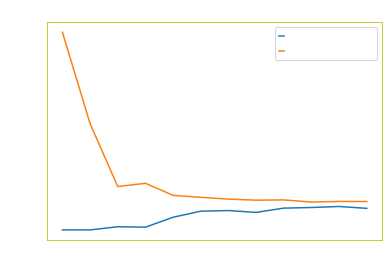

In [11]:
p1, p2 = plt.plot(range(m), error_training, range(m), error_validation)
plt.title('Learning curve for linear regression')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend((p1, p2), ('Train', 'Cross Validation'), numpoints=1, handlelength=0.5);

## <center><font color=tomato>3. Polynomial regression</font></center>
The training error will tend to decrease as we increase the degree d of the polynomial.

At the same time, the cross validation error will tend to decrease as we increase d up to a point, and then it will increase as d is increased, forming a convex curve.

High bias (underfitting): both $J_{train}(Θ)$ and $J_{CV}(Θ)$ will be high. Also, $J_{CV}(Θ) ≈ J_{train}(Θ)$.

High variance (overfitting): $J_{train}(Θ)$ will be low and $J_{CV}(Θ)$ will be much greater than $J_{train}(Θ)$
The is summarized in the figure below:

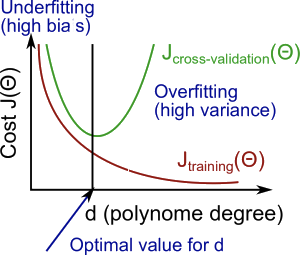

In [12]:
display(Image('data/img1.png'))

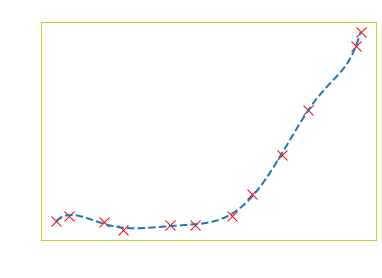

In [13]:
p = 8
X_poly = poly_features(X, degree=p)
X_poly, mu, sigma = feature_normalization(X_poly)
X_poly_ones = add_ones(X_poly)

X_poly_test = poly_features(Xtest, degree=p)
X_poly_test = (X_poly_test - mu)/sigma
X_poly_test_ones = add_ones(X_poly_test)

X_poly_val = poly_features(Xval, degree=p)
X_poly_val = (X_poly_val - mu)/sigma
X_poly_val_ones = add_ones(X_poly_val)

Lambda = 0
poly_regression_fit_plot(X_poly_ones, X, y, Lambda, mu, sigma, p)

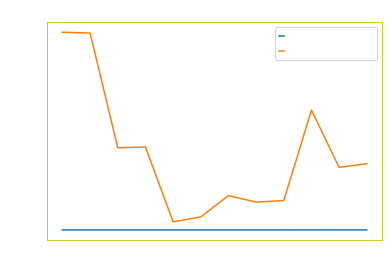

In [14]:
poly_regression_learning_curve_plot(X_poly_ones, y, X_poly_val_ones, yval, Lambda, m)

### <font color=lightGreen>3.2.  Adjusting the regularization parameter</font>


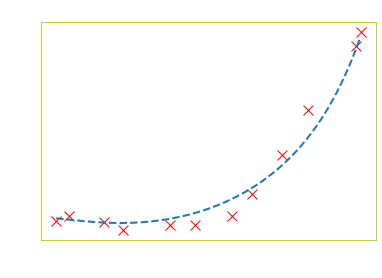

In [15]:
Lambda = 1
poly_regression_fit_plot(X_poly_ones, X, y, Lambda, mu, sigma, p)

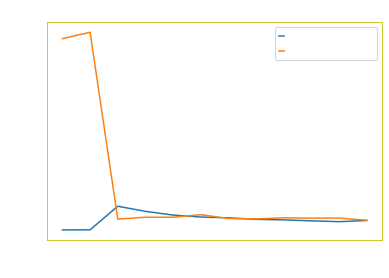

In [16]:
poly_regression_learning_curve_plot(X_poly_ones, y, X_poly_val_ones, yval, Lambda, m)

### <font color=lightGreen>3.3 Selecting lambda using a cross validation set</font>

In [17]:
lambda_vec = np.array([0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10])

error_training, error_validation = curve_validation(X_poly_ones, y, X_poly_val_ones, yval, lambda_vec)

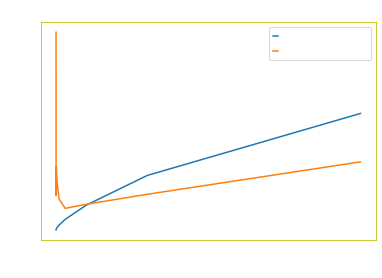

In [18]:
p1, p2 = plt.plot(lambda_vec, error_training, lambda_vec, error_validation)
plt.title('Lambda cross validation')
plt.xlabel('Lambda')
plt.ylabel('Error')
plt.legend((p1, p2), ('Train', 'Cross Validation'), numpoints=1, handlelength=0.5);

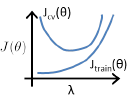

In [19]:
display(Image('data/img2.png'))

### <font color=lightGreen>3.4. Computing test set error</font>


In [20]:
theta = train_linear_reg(X_poly_ones, y, Lambda=3)
error_test, _ = linear_regression_reg_cost(theta, X_poly_test_ones, ytest, Lambda=0)
print(f'Test set error: {error_test:.4f}\n')

Test set error: 3.5720



### <font color=lightGreen>3.5. Plotting learning curves with randomly selected examples</font>


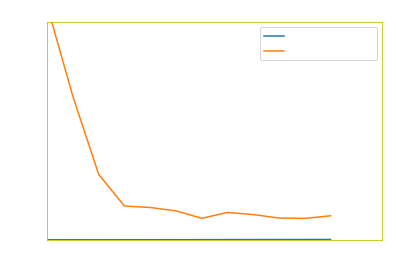

# Training Examples	Train Error	Cross Validation Error

  	1		0.0000		161.3524

  	2		0.0172		98.7375

  	3		0.0136		45.0545

  	4		0.0281		23.2931

  	5		0.0455		22.2853

  	6		0.0650		19.9538

  	7		0.0967		14.8538

  	8		0.1294		18.8606

  	9		0.1417		17.3983

  	10		0.1661		15.0207

  	11		0.2053		14.7646

  	12		0.2180		16.5651



In [21]:
m = X.shape[0]
# lambda_val value for this step
lambda_val = 0.01

# number of iterations
times = 50

# initialize error matrices
error_train_rand = np.zeros((m, times))
error_val_rand   = np.zeros((m, times))

for i in range(1,m+1):

    for k in range(times):

        # choose i random training examples
        rand_sample_train = np.random.permutation(X_poly_ones.shape[0])
        rand_sample_train = rand_sample_train[:i]

        # choose i random cross validation examples
        rand_sample_val   = np.random.permutation(X_poly_val_ones.shape[0])
        rand_sample_val   = rand_sample_val[:i]

        # define training and cross validation sets for this loop
        X_poly_train_rand = X_poly_ones[rand_sample_train,:]
        y_train_rand = y[rand_sample_train]
        X_poly_val_rand   = X_poly_val_ones[rand_sample_val,:]
        yval_rand = yval[rand_sample_val]

        # note that we're using X_poly_val_ones_train_rand and y_train_rand in training
        theta = train_linear_reg(X_poly_train_rand, y_train_rand, lambda_val)

        # we use X_poly_val_ones_train_rand, y_train_rand, X_poly_val_ones_train_rand, X_poly_val_ones_rand
        error_train_rand[i-1,k], _ = linear_regression_reg_cost(theta, X_poly_train_rand, y_train_rand, 0)
        error_val_rand[i-1,k], _   = linear_regression_reg_cost(theta, X_poly_val_rand, yval_rand, 0)


error_train = np.mean(error_train_rand, axis=1)
error_val   = np.mean(error_val_rand, axis=1)


p1, p2 = plt.plot(range(m), error_train, range(m), error_val)
plt.title(f'Polynomial Regression Learning Curve (lambda = {lambda_val:.4f})')
plt.legend((p1, p2), ('Train', 'Cross Validation'))
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 150])
plt.show(block=False)


print('# Training Examples\tTrain Error\tCross Validation Error\n')
for i in range(m):
    print(f'  \t{i+1:d}\t\t{error_train[i]:.4f}\t\t{error_val[i]:.4f}\n')